In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets

# Problem 1

In this problem we will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), one obtains the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [4]:
data = datasets.fetch_olivetti_faces()
images = data.images

(a) Given an $m \times n$ image $M$ and its rank-$k$ approximation $A$, we can measure the reconstruction error using mean $\ell_1$ error: $$ \text{error}_{\ell_1}(M, A) = \frac{1}{mn}\| M - A \|_1 = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}| M_{i,j} - A_{i,j} |. $$ For $k = 1, \dots, 30$, take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

In [5]:
# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    # TODO: Complete this!
    # Advice: pass in full_matrices=False to svd to avoid dimensionality issues
    
    U, s, Vt = np.linalg.svd(M, full_matrices=False)
    # print(f"{U.shape=}, {s.shape=}, {Vt.shape=}")
    U_k = U[:, :k]
    s_k = s[:k]
    Vt_k = Vt[:k, :]
    # print(f"{U_k.shape=}, {s_k.shape=}, {Vt_k.shape=}")

    # the retruned dimension is the same as the original M, but with only the top k singular values
    return U_k @ np.diag(s_k) @ Vt_k 

In [6]:
# for all k = 1,2,...30, compute and plat average rank k reconstruction error across all 400 images
errors = []
for k in range(1, 31):
    error = 0
    for img in images:
        # compute loss using the L1 norm, i.e. the sum of absolute differences between the original and reconstructed image
        error += np.sum(np.abs(img - svd_reconstruct(img, k))) / img.size
    errors.append(error / len(images))

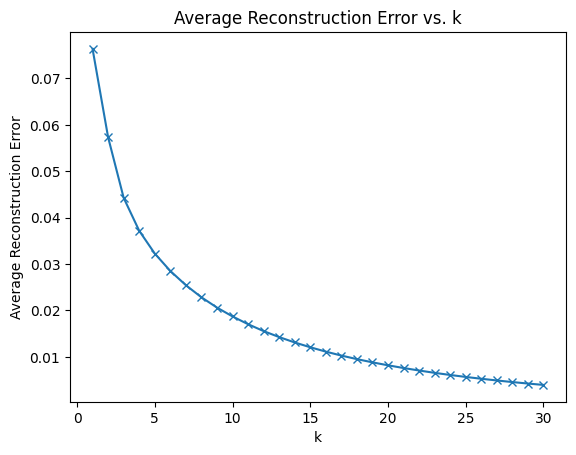

In [7]:
plt.plot(range(1, 31), errors, marker='x')
plt.xlabel('k')
plt.ylabel('Average Reconstruction Error')
plt.title('Average Reconstruction Error vs. k')
plt.show()

(b) Pick any image in the dataset, and display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$. You will find the `imshow` method in matplotlib useful for this; pass in `cmap='gray'` to render in grayscale. Feel free to play around further.

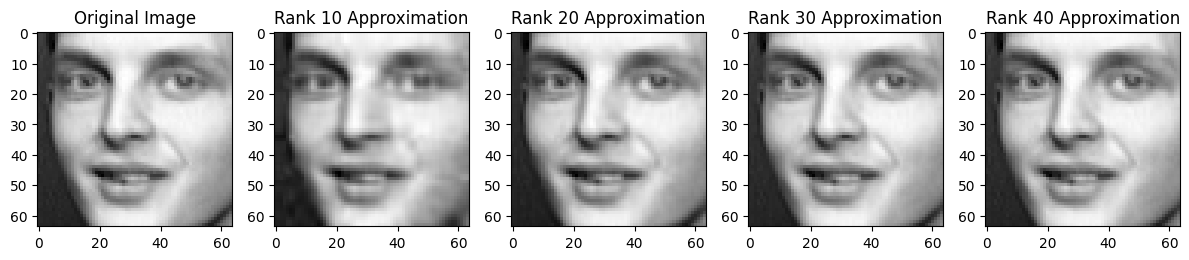

In [17]:
# from a random image in the dataset, show the original image and its rank approximations
import matplotlib.pyplot as plt

# show the original image and the corresponding image for rank k = 10,20,30,40
random_image = images[np.random.randint(0, len(images))]
plt.figure(figsize=(12, 4))

plt.subplot(1, 5, 1)
plt.imshow(random_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 5, 2)
plt.imshow(svd_reconstruct(random_image, 10), cmap='gray')
plt.title('Rank 10 Approximation')

plt.subplot(1, 5, 3)
plt.imshow(svd_reconstruct(random_image, 20), cmap='gray')
plt.title('Rank 20 Approximation')

plt.subplot(1, 5, 4)
plt.imshow(svd_reconstruct(random_image, 30), cmap='gray')
plt.title('Rank 30 Approximation')

plt.subplot(1, 5, 5)
plt.imshow(svd_reconstruct(random_image, 40), cmap='gray')
plt.title('Rank 40 Approximation')

plt.tight_layout()
plt.show()

# Problem 2

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

In [9]:
cancer = datasets.load_breast_cancer()

In [10]:
# normalize the feature to have mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [11]:
# compute the top two principal components of the data using SVD
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=False)
# Get first two rows of Vt, as those represent the top two principal components(eigenvectors of X_scaled.T @ X_scaled)
top_2_components = Vt[:2, :]

# project the data onto the top two principal components
X_projected = X_scaled @ top_2_components.T
print(f"Original shape: {X_scaled.shape}, Projected shape: {X_projected.shape}")

Original shape: (569, 30), Projected shape: (569, 2)


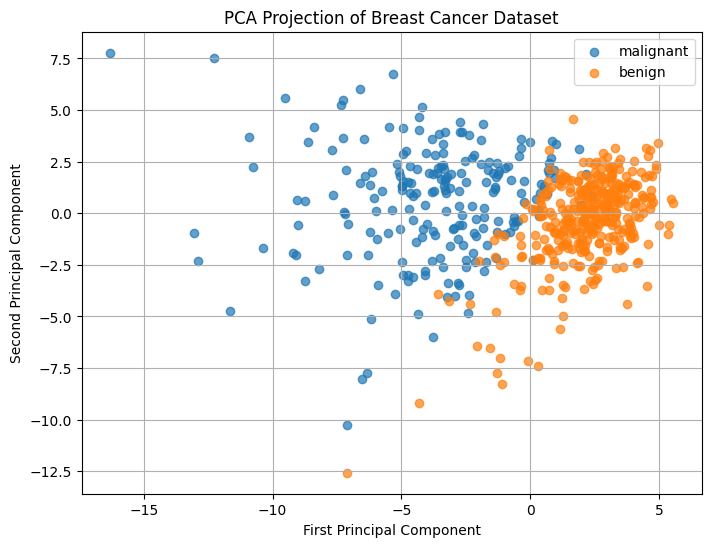

In [12]:
# plot the projected data, coloring the points by their class label
# x-axis is the first principal component, y-axis is the second principal component
plt.figure(figsize=(8, 6))
for label in np.unique(cancer.target):
    plt.scatter(X_projected[cancer.target == label, 0], X_projected[cancer.target == label, 1], label=f'{cancer.target_names[label]}', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection of Breast Cancer Dataset')
plt.legend()
plt.grid()
plt.show() 

In [13]:
# Now we will do the same using PCA from sklearn and compare the results
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Let's ensure both the components obtained from PCA are pointing in the same direction as the one we obtained from SVD, as PCA can return components that are flipped in sign compared to SVD
# let's take dot product of the components obtained from PCA and SVD, if the dot product is negative, we will flip the sign of the PCA components
pca.fit(X_scaled)
pca_components = pca.components_
for i in range(2):
    if np.dot(pca_components[i], top_2_components[i]) < 0:
        pca_components[i] = -pca_components[i]

# get the projected data using the modified PCA components
X_pca = X_scaled @ pca_components.T
print(f"Original shape: {X_scaled.shape}, PCA Projected shape: {X_pca.shape}")

Original shape: (569, 30), PCA Projected shape: (569, 2)


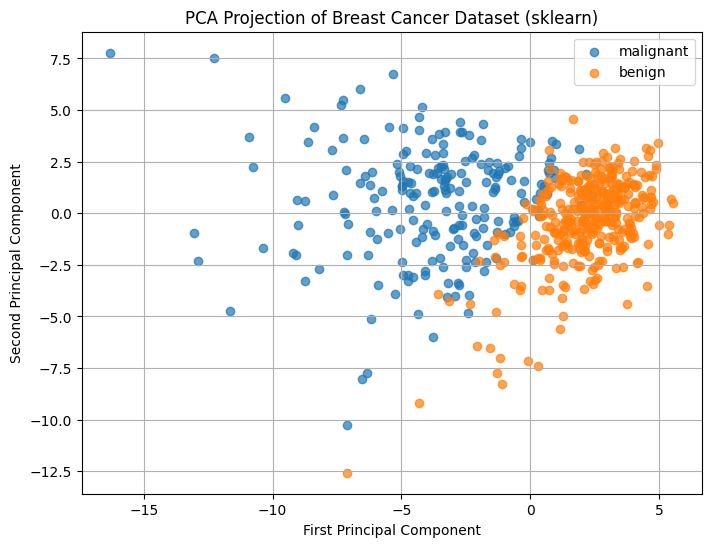

In [14]:
plt.figure(figsize=(8, 6))
for label in np.unique(cancer.target):
    plt.scatter(X_pca[cancer.target == label, 0], X_pca[cancer.target == label, 1], label=f'{cancer.target_names[label]}', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection of Breast Cancer Dataset (sklearn)')
plt.legend()
plt.grid()
plt.show()